# Parkinson's Freezing of Gait (FoG) Prediction

### What is FoG?
FoG is a symptom of Parkinson's disease (PD) during which the patient's feet are *glued* to the ground preventing them from moving forward. Each episode often lasts about 1-2 seconds. There are currently multiple theories to explain FoG, but still no clear understaning what causes it.

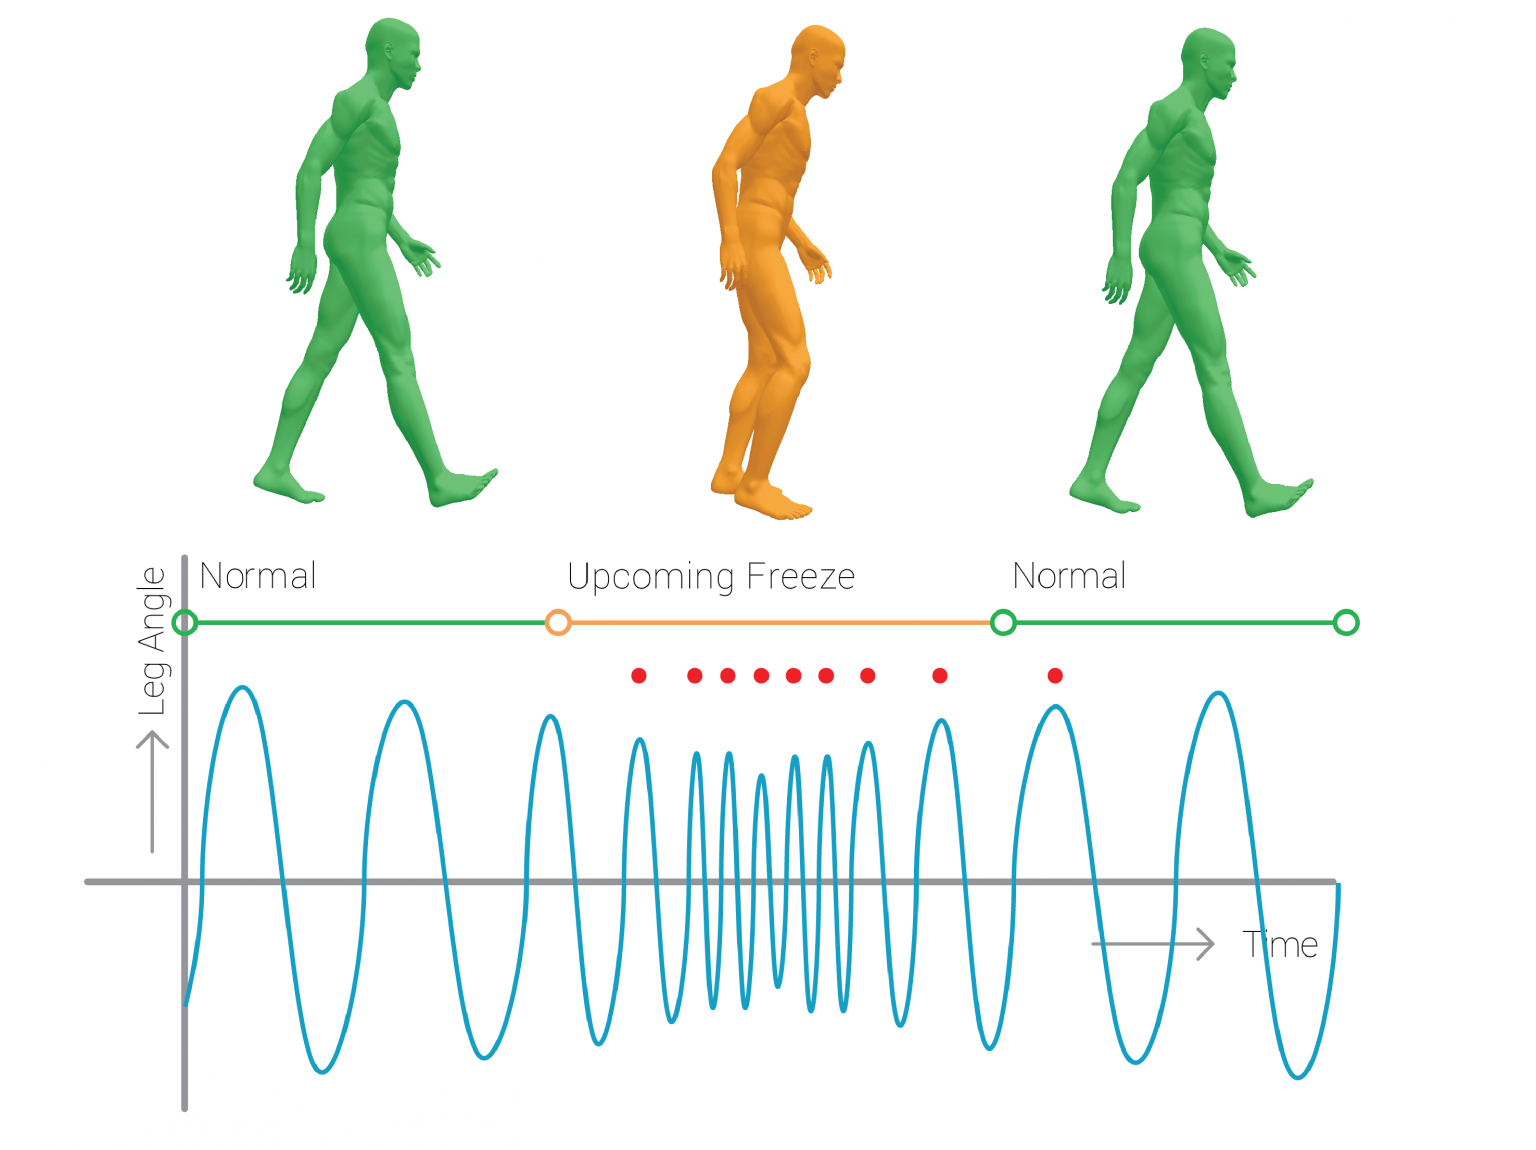

### The Dataset
#### **Data collection**
There different ways of evaluating FoG.

**Video:** Usually people are filmed while performing tasks thought to incrarease FoG occurrence. These videos are then reviewed and each frame is scored.

**Sensors (Lower back accelerometer):** Wearable devides is another way, especially in combination with ML these results can give high accuracy.


#### **Dataset - Lower-back 3D Accelerometer**
There are 3 datasets:

***1. tDCS FOG*** - Subjects made **multiple visits** at the lab and completed FoG-provoking protocol while wearing the lower-back 3D accelerometer (sampling rate **128Hz**). Both **'off' and 'on' anti-PD medication**. Start, end, and type of episode are annotated by experts.

*NOTE!* Data recording include short periof (2-3s) of quiet standing before the start of the test. 


***2. DeFOG*** - **Two visits** at the subject's home as they compmleted FoG-provoking protocol while wearing the lower-back 3D accelerometer (sampling rate **100Hz**). Both **'off' and 'on' anti-PD medication**. Start, end, and type of episode are annotated by experts.


**3. Daily Living** - One week of contintous 24/7 recordings from 65 subject (45 with FoG symptoms (with series), 20 without FoG symptoms (no series)) while wearing the lower-back 3D accelerometer (sampling rate **100Hz**). Unannotated. (Also contains one week of unlabeled continous recordings. 


*NOTE!* Lower-back accelerator is the same for the at home and daily living recordings, but different from the at lab accelerator. 

### Goal
Detecting FoG episodes for tDCS FOG and DeFOG. 
* Detect the start and stop of each FoG episode
* Occurrence of thses series in three types of FoG events:
    1. Start Hesitation
    2. Turn 
    3. Walking - dual tasking i.e. walking + talking

In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [9]:
# Dataset folders
data_folder = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction"
train_folder = f'{data_folder}/train'
test_folder = f'{data_folder}/test'
unlabeled_folder = f'{data_folder}/unlabeled'

In [10]:
# Datasets

# Lab Dataset (tDCS FOG)
lab_train_folder = f'{train_folder}/tdcsfog'
lab_test_folder = f'{test_folder}/tdcsfog'

# Home-supervised dataset (deFOG)
home_supervised_train_folder = f'{train_folder}/defog'
home_supervised_test_folder = f'{test_folder}/defog'

# No-type dataset
notype_train_train = f'{train_folder}/notype'

# Events data
df_events = pd.read_csv(f'{data_folder}/events.csv')

# Tasks data
df_tasks = pd.read_csv(f'{data_folder}/tasks.csv')

# Subjects data
df_subjects = pd.read_csv(f'{data_folder}/subjects.csv')

# Sample_submission data
df_sample_submission = pd.read_csv(f'{data_folder}/sample_submission.csv')

# Lab metadata
df_lab_metadata = pd.read_csv(f'{data_folder}/tdcsfog_metadata.csv')

# Home metadata
df_home_metadata = pd.read_csv(f'{data_folder}/defog_metadata.csv')

# Daily metadata
df_daily_metadata = pd.read_csv(f'{data_folder}/daily_metadata.csv')

In [11]:
#os.listdir(lab_train_folder)

## EDA

### 1. Data example - Train dataset

In [12]:
df_lab_example = pd.read_csv(f'{lab_train_folder}/003f117e14.csv')

In [13]:
df_lab_example.head(5)

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.533939,0.566322,-1.413525,0,0,0
1,1,-9.536140,0.564137,-1.440621,0,0,0
2,2,-9.529345,0.561765,-1.429332,0,0,0
3,3,-9.531239,0.564227,-1.415490,0,0,0
4,4,-9.540825,0.561854,-1.429471,0,0,0


In [16]:
fig = px.line(
    df_lab_example, 
    x='Time', 
    y=['AccV','AccML','AccAP'],
    color_discrete_sequence=['red', 'blue', 'green'], 
    hover_name = 'Time', 
    hover_data = ['StartHesitation', 'Turn', 'Walking'],
)
# Add color blocks based on the first and last time where each of the three categories is 1
for cat, color in zip(['StartHesitation', 'Turn', 'Walking'], ['grey', 'orange', 'purple']):
    mask = df_lab_example[cat].diff().fillna(0).eq(1)
    start_times = df_lab_example['Time'][mask]
    end_times = df_lab_example['Time'][mask.shift(-1).fillna(False)]
    for start_time, end_time in zip(start_times, end_times):
        fig.add_shape(type='rect', x0=start_time, y0=-10, x1=end_time, y1=10,
                      fillcolor=color, opacity=0.8, line=dict(width=0))
fig.update_layout(
    title = {'text': 'Lower-Back Accelerometer Time Series', 
           'y':0.95, 
           'x':0.5, 
           'xanchor': 'center', 
           'yanchor': 'top'},
    xaxis_title = 'Time (128 timestamps/s)', 
    yaxis_title = 'Acceleration (m/s^2)', 
    legend_title = 'Variable',
    hovermode = 'x')

fig.show()